<a href="https://colab.research.google.com/github/yogesh11100/colab/blob/main/densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [ ]:
# re-size all the images 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/tomato - Copy (2)/train'
valid_path = '/content/drive/MyDrive/tomato - Copy (2)/test'

Text(0.5, 1.0, 'Leaf Mold')

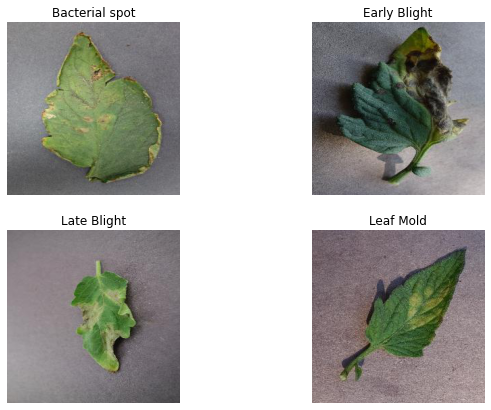

In [ ]:
#dispalying images from training dataset
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
# reading images
Image1 = Image.open('/content/drive/MyDrive/tomato - Copy (2)/train/Tomato___Bacterial_spot/Bacterial spot_102.jpg')
Image2 = Image.open('/content/drive/MyDrive/tomato - Copy (2)/train/Tomato___Early_blight/Early blight_10.jpg')
Image3 = Image.open('/content/drive/MyDrive/tomato - Copy (2)/train/Tomato___Late_blight/Late blight_1001.jpg')
Image4 = Image.open('/content/drive/MyDrive/tomato - Copy (2)/train/Tomato___Leaf_Mold/Leaf mold_102.jpg')
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Bacterial spot")
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Early Blight")
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("Late Blight")
fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("Leaf Mold")


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

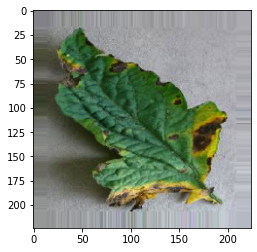

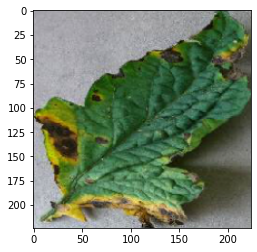

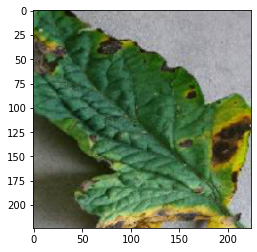

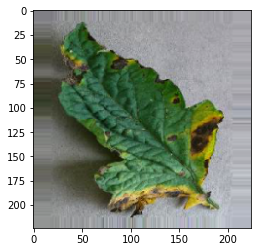

In [ ]:
#sample augmented images
dir="/content/drive/MyDrive/tomato - Copy (2)/test/Tomato___Early_blight"
fnames = [os.path.join(dir, fname) for
  fname in os.listdir(dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
training_set = train_datagen.flow_from_directory( '/content/drive/MyDrive/tomato - Copy (2)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/tomato - Copy (2)/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
#instantiate densenet121 architecture
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
#freezing the layers
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
#useful for getting number of output classes
folders = glob('/content/drive/MyDrive/tomato - Copy (2)/train/*')

In [ ]:
#input layer
print(densenet.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
print(densenet.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")


In [ ]:
#add new layer to the model
x = Flatten()(densenet.output)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 50176), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")


In [ ]:
#output layer
prediction = Dense(len(folders), activation='softmax')(x)
print(prediction)


KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [ ]:
# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [ ]:


# view the structure of the model
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#  cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
157/157 [==============================] - 2827s 18s/step - loss: 1.3733 - accuracy: 0.7944 - val_loss: 0.6468 - val_accuracy: 0.8740
Epoch 2/20
157/157 [==============================] - 80s 509ms/step - loss: 0.3764 - accuracy: 0.9210 - val_loss: 0.5857 - val_accuracy: 0.9000
Epoch 3/20
157/157 [==============================] - 80s 511ms/step - loss: 0.3394 - accuracy: 0.9305 - val_loss: 0.6586 - val_accuracy: 0.9220
Epoch 4/20
157/157 [==============================] - 80s 508ms/step - loss: 0.2744 - accuracy: 0.9467 - val_loss: 0.5166 - val_accuracy: 0.9240
Epoch 5/20
157/157 [==============================] - 80s 506ms/step - loss: 0.3225 - accuracy: 0.9425 - val_loss: 1.0246 - val_accuracy: 0.8900
Epoch 6/20
157/157 [==============================] - 79s 505ms/step - loss: 0.1801 - accuracy: 0.9634 - val_loss: 0.6611 - val_accuracy: 0.9340
Epoch 7/20
157/157 [==============================] - 80s 507ms/step - loss: 0.3488 - accuracy: 0.9486 - val_loss: 0.8009 - val_ac

In [ ]:
import matplotlib.pyplot as plt

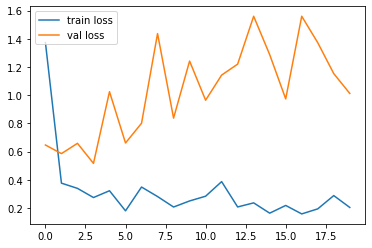

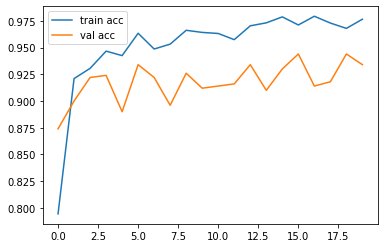

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/model_densenet.h5')

index: 1
Prediction: Tomato_Early_blight


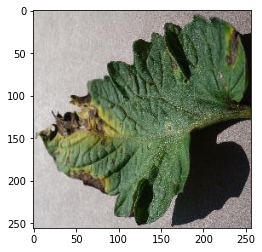

In [ ]:
from keras.models import load_model
import os
import tensorflow as tf
from tensorflow import keras
from skimage import io
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

#load model
model =tf.keras.models.load_model('/content/drive/MyDrive/model_densenet.h5',compile=False)

def model_predict(img_path, model):
    img = image.load_img(img_path, grayscale=False, target_size=(224, 224))
    show_img = image.load_img(img_path, grayscale=False, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = np.array(x, 'float32')
    x /= 255
    preds = model.predict(x)
    return preds
file_path='/content/Early blight_10.jpg'
        # Make prediction
preds = model_predict(file_path, model)

disease_class = [ 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
                         'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']
a=preds[0]
ind=np.argmax(a)
print("index:",ind)
disease=image.load_img(file_path)
plt.imshow(disease)
print('Prediction:', disease_class[ind])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
